**Hand Gesture Detection assignment**



   Instruction/Hints are mentioned, to run the cell you have to do shift+enter



In [73]:
!pip install opendatasets
!pip install keras
!pip install tensorflow
!pip install rasa==1.1.4;

  Using cached rasa-1.1.4-py3-none-any.whl (447 kB)
  Obtaining dependency information for boto3~=1.9 from https://files.pythonhosted.org/packages/d4/e8/3ccebf1cb78702beb8bb2e535525ff350d0f597ff794baeeab5206800a2c/boto3-1.34.1-py3-none-any.whl.metadata
  Using cached boto3-1.34.1-py3-none-any.whl.metadata (6.6 kB)
  Obtaining dependency information for simplejson~=3.16 from https://files.pythonhosted.org/packages/b6/8e/3e12d122dfdf549a8d12eaf39954ee39f2027060aa38b63430f8ab3244e7/simplejson-3.19.2-cp311-cp311-win_amd64.whl.metadata
  Using cached simplejson-3.19.2-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
  Using cached jsonpickle-1.5.2-py2.py3-none-any.whl (37 kB)
  Using cached redis-3.5.3-py2.py3-none-any.whl (72 kB)
  Using cached fakeredis-1.10.2-py3-none-any.whl (43 kB)
  Using cached pymongo-3.13.0-cp311-cp311-win_amd64.whl (394 kB)
INFO: pip is looking at multiple versions of rasa to determine which version is compatible with other requirements. This could take a while.


ERROR: Ignored the following versions that require a different python version: 1.10.10 Requires-Python >=3.6,<3.8; 1.10.11 Requires-Python >=3.6,<3.8; 1.10.12 Requires-Python >=3.6,<3.8; 1.10.13 Requires-Python >=3.6,<3.8; 1.10.14 Requires-Python >=3.6,<3.8; 1.10.15 Requires-Python >=3.6,<3.8; 1.10.16 Requires-Python >=3.6,<3.8; 1.10.17 Requires-Python >=3.6,<3.8; 1.10.18 Requires-Python >=3.6,<3.8; 1.10.19 Requires-Python >=3.6,<3.8; 1.10.20 Requires-Python >=3.6,<3.8; 1.10.21 Requires-Python >=3.6,<3.8; 1.10.22 Requires-Python >=3.6,<3.8; 1.10.23 Requires-Python >=3.6,<3.8; 1.10.24 Requires-Python >=3.6,<3.8; 1.10.25 Requires-Python >=3.6,<3.8; 1.10.26 Requires-Python >=3.6,<3.8; 1.10.3 Requires-Python >=3.6,<3.8; 1.10.4 Requires-Python >=3.6,<3.8; 1.10.5 Requires-Python >=3.6,<3.8; 1.10.6 Requires-Python >=3.6,<3.8; 1.10.7 Requires-Python >=3.6,<3.8; 1.10.8 Requires-Python >=3.6,<3.8; 1.10.9 Requires-Python >=3.6,<3.8; 2.0.0 Requires-Python >=3.6,<3.9; 2.0.0a1 Requires-Python >=3.6,

In [74]:
# Import all the necessary dependcies

import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
tf.keras.backend.clear_session()

You will have to make an account on kaggle and will have to use that 'username' and key.

In [75]:
# Download the dataset from kaggle


import opendatasets as od
import pandas as pd
od.download("https://www.kaggle.com/datasets/koryakinp/fingers")

Skipping, found downloaded files in ".\fingers" (use force=True to force download)


In [76]:
!pip install opencv-python

In [77]:
import os
import cv2
import numpy as np

# Path to the dataset directory
dataset_dir = 'C:/Users/neeld/Downloads/fingers/test'

# Initialize lists to store images and labels
images = []
labels = []

# Iterate through each image file
for filename in os.listdir(dataset_dir):
    # Load the image using OpenCV
    img_path = os.path.join(dataset_dir, filename)
    img = cv2.imread(img_path)

    # Resize the image to a desired size (e.g., 64x64)
    img = cv2.resize(img, (64, 64))

    # Append the image to the images list
    images.append(img)

    # Get the label from the filename (the first character)
    label = filename[0]  
    labels.append(label)

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

In [78]:
import cv2
import os
import numpy as np

image_dir = 'C:/Users/neeld/Downloads/fingers/train'

# List to store image data
x_train = []

# Iterate through each image file in the directory
for filename in os.listdir(image_dir):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        # Construct the full file path
        file_path = os.path.join(image_dir, filename)

        # Load the image using OpenCV
        img = cv2.imread(file_path)

        # Resize the image if needed
        img = cv2.resize(img, (64, 64))

        # Append the image to the x_train list
        x_train.append(img)

# Convert the list to a NumPy array
x_train = np.array(x_train)

# Display the shape of x_train
print("x_train shape:", x_train.shape)

x_train shape: (18000, 64, 64, 3)


In [79]:
import cv2
import os
import numpy as np

image_dir = 'C:/Users/neeld/Downloads/fingers/test'

# List to store image data
x_test = []

# Iterate through each image file in the directory
for filename in os.listdir(image_dir):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        # Construct the full file path
        file_path = os.path.join(image_dir, filename)

        # Load the image using OpenCV
        img = cv2.imread(file_path)

        # Resize the image if needed
        img = cv2.resize(img, (64, 64))

        # Append the image to the x_train list
        x_test.append(img)

# Convert the list to a NumPy array
x_test = np.array(x_test)

# Display the shape of x_train
print("x_test shape:", x_test.shape)

x_test shape: (3600, 64, 64, 3)


In [80]:
# Reshape images to add a channel dimension
x_train = x_train.reshape((-1, 64, 64, 1))
x_test = x_test.reshape((-1, 64, 64, 1))

In [81]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [82]:
# Path to the dataset directory
dataset_dir = 'C:/Users/neeld/Downloads/fingers/train'

y_train = []

# Iterate through each image file
for filename in os.listdir(dataset_dir):

 # Split the filename by underscores ('_')
    parts = filename.split('_')
    
    # Extract the label from the last part (assuming it's a number)
    label = int(parts[-1][0])
    y_train.append(label)
# Convert the lists to NumPy arrays
y_train = np.array(y_train)

In [83]:
# Path to the dataset directory
dataset_dir = 'C:/Users/neeld/Downloads/fingers/test'

y_test = []

# Iterate through each image file
for filename in os.listdir(dataset_dir):

 # Split the filename by underscores ('_')
    parts = filename.split('_')
    
    # Extract the label from the last part (assuming it's a number)
    label = int(parts[-1][0])
    y_test.append(label)
# Convert the lists to NumPy arrays
y_test = np.array(y_test)

In [84]:
from tensorflow.keras.utils import to_categorical


Y_train = to_categorical(y_train, num_classes=6)

Y_test = to_categorical(y_test, num_classes=6)

In [85]:
print ("Y_train shape: " + str(Y_train.shape))
print ("Y_test shape: " + str(Y_test.shape))

Y_train shape: (18000, 6)
Y_test shape: (3600, 6)


In [86]:
# MAKE YOUR CNN MODEL HERE

import tensorflow as tf
from tensorflow.keras import layers, models

def convolutional_model(input_shape):
    model = models.Sequential()

    # First Convolutional Layer
    model.add(layers.Conv2D(8, (4, 4), strides=(1, 1), padding='SAME', input_shape=input_shape))
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((8, 8), strides=(8, 8), padding='SAME'))

    # Second Convolutional Layer
    model.add(layers.Conv2D(16, (2, 2), strides=(1, 1), padding='SAME'))
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((4, 4), strides=(4, 4), padding='SAME'))

    # Flatten Layer
    model.add(layers.Flatten())

    # Fully Connected (Dense) Layer
    model.add(layers.Dense(6, activation='softmax'))

    return model

# Example usage
input_shape = (64, 64, 1)
model = convolutional_model(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 8)         136       
                                                                 
 activation (Activation)     (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 8)           0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 activation_1 (Activation)   (None, 8, 8, 16)          0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 16)          0         
 g2D)                                                   

In [87]:
# Import necessary libraries
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

# Create your model
conv_model = convolutional_model((64, 64, 1))

# Compile the model
conv_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   loss=tf.keras.losses.CategoricalCrossentropy(),
                   metrics=[tf.keras.metrics.CategoricalAccuracy()])

# Print a summary of the compiled model
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         136       
                                                                 
 activation_2 (Activation)   (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 activation_3 (Activation)   (None, 8, 8, 16)          0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 2, 2, 16)          0         
 g2D)                                                 

In [88]:
# SLICE THE DATASET FOR 1800 IMAGES FOR TRAINING AND 300 FOR TESTING, ALSO MENTION THE BATCH SIZE

# Slicing the dataset for training
x_train_slice = x_train[:1800]
Y_train_slice = Y_train[:1800]

# Slicing the dataset for testing
x_test_slice = x_test[:300]
Y_test_slice = Y_test[:300]

# Batch size
batch_size = 32

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_slice, Y_train_slice))
train_dataset = train_dataset.batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test_slice, Y_test_slice))
test_dataset = test_dataset.batch(batch_size)


In [93]:
# TWEAK THE NUMBER OF IMAGES TO GET BETTER RESULTS
# Specify the number of epochs
num_epochs = 10000 

# Train the model
history = conv_model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10000
57/57 [==============================] - 1s 11ms/step - loss: 1.6564 - categorical_accuracy: 0.3039 - val_loss: 1.9905 - val_categorical_accuracy: 0.1567
Epoch 2/10000
57/57 [==============================] - 1s 12ms/step - loss: 1.6509 - categorical_accuracy: 0.2989 - val_loss: 1.9913 - val_categorical_accuracy: 0.1733
Epoch 3/10000
57/57 [==============================] - 1s 12ms/step - loss: 1.6506 - categorical_accuracy: 0.2994 - val_loss: 2.0004 - val_categorical_accuracy: 0.1567
Epoch 4/10000
57/57 [==============================] - 1s 13ms/step - loss: 1.6443 - categorical_accuracy: 0.3028 - val_loss: 2.0109 - val_categorical_accuracy: 0.1467
Epoch 5/10000
57/57 [==============================] - 1s 13ms/step - loss: 1.6438 - categorical_accuracy: 0.3089 - val_loss: 2.0000 - val_categorical_accuracy: 0.1700
Epoch 6/10000
57/57 [==============================] - 1s 13ms/step - loss: 1.6527 - categorical_accuracy: 0.3000 - val_loss: 1.9921 - val_categorical_accuracy:

PLOT YOUR RESULTS HERE


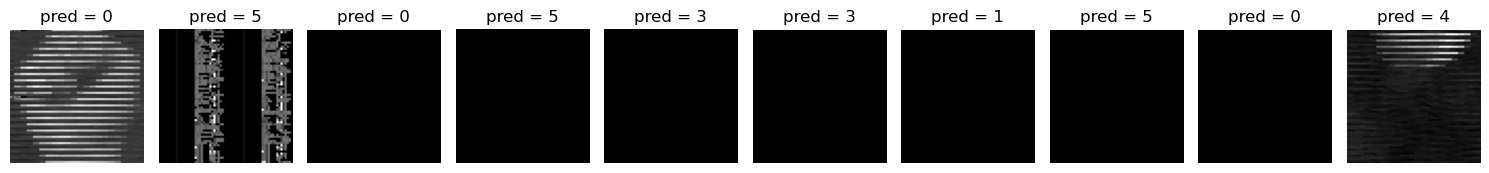

In [134]:
import random
import cv2
import numpy as np
from matplotlib import pyplot as plt

numbers = list(range(1, 1001))
random_array = random.sample(numbers, 10)

fig = plt.figure(figsize=(15, 7))  # Increase the width for better visualization

for i, idx in enumerate(random_array):
    img_resized = cv2.resize(x_test[idx], (64, 64))
    y_pred = np.argmax(conv_model.predict(np.expand_dims(x_test[idx], axis=0), verbose=0))
    ax = fig.add_subplot(1, 10, i + 1)
    ax.imshow(img_resized, cmap='gray')
    ax.axis('off')
    ax.set_title("pred = " + str(y_pred))

plt.tight_layout()
plt.show()